In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## VN-Index (months)

In [2]:
df = pd.read_csv("C:\Code\VN-Index\Raw Data\VN Index Historical Data (months).csv")

In [3]:
df.head

<bound method NDFrame.head of            Date     Price      Open      High       Low     Vol. Change %
0    09/01/2024  1,251.71  1,283.87  1,283.87  1,244.79      NaN   -2.50%
1    08/01/2024  1,283.87  1,251.51  1,290.45  1,184.53   15.47B    2.59%
2    07/01/2024  1,251.51  1,245.32  1,297.96  1,218.65   15.64M    0.50%
3    06/01/2024  1,245.32  1,261.72  1,306.01  1,240.15   18.12M   -1.30%
4    05/01/2024  1,261.72  1,212.13  1,285.63  1,206.28   19.39M    4.32%
..          ...       ...       ...       ...       ...      ...      ...
136  05/01/2013    518.39    474.54    526.58    470.81    1.50M    9.25%
137  04/01/2013    474.51    490.66    518.46    466.56  926.70K   -3.37%
138  03/01/2013    491.04    476.51    500.59    461.61    1.05M    3.47%
139  02/01/2013    474.56    477.11    497.87    459.64    1.15M   -1.09%
140  01/01/2013    479.79    415.50    490.89    413.68    1.83M   15.97%

[141 rows x 7 columns]>

In [4]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
136,05/01/2013,518.39,474.54,526.58,470.81,1.50M,9.25%
137,04/01/2013,474.51,490.66,518.46,466.56,926.70K,-3.37%
138,03/01/2013,491.04,476.51,500.59,461.61,1.05M,3.47%
139,02/01/2013,474.56,477.11,497.87,459.64,1.15M,-1.09%
140,01/01/2013,479.79,415.50,490.89,413.68,1.83M,15.97%


In [5]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,141,141,141,141,141,140,141
unique,141,141,141,141,141,130,134
top,09/01/2024,"1,251.71","1,283.87","1,283.87","1,244.79",2.80M,4.72%
freq,1,1,1,1,1,2,2


In [6]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

In [8]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
#df=df.set_index('Date')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df['Volume'] = df['Vol.'].replace({'B': '*1e9', 'M': '*1e6', 'K':'*1e3'}, regex=True).map(pd.eval).astype(float)
df['Volume'] = df['Volume'].apply(lambda x: f"{x:,.0f}")  # Định dạng số với dấu phẩy
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Volume
0,2024-09-01,1251.71,1283.87,1283.87,1244.79,0,-2.50,2024,0
1,2024-08-01,1283.87,1251.51,1290.45,1184.53,15.47B,2.59,2024,"15,470,000,000"
2,2024-07-01,1251.51,1245.32,1297.96,1218.65,15.64M,0.50,2024,"15,640,000"
3,2024-06-01,1245.32,1261.72,1306.01,1240.15,18.12M,-1.30,2024,"18,120,000"
4,2024-05-01,1261.72,1212.13,1285.63,1206.28,19.39M,4.32,2024,"19,390,000"


In [9]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Volume
136,2013-05-01,518.39,474.54,526.58,470.81,1.50M,9.25,2013,"1,500,000"
137,2013-04-01,474.51,490.66,518.46,466.56,926.70K,-3.37,2013,"926,700"
138,2013-03-01,491.04,476.51,500.59,461.61,1.05M,3.47,2013,"1,050,000"
139,2013-02-01,474.56,477.11,497.87,459.64,1.15M,-1.09,2013,"1,150,000"
140,2013-01-01,479.79,415.50,490.89,413.68,1.83M,15.97,2013,"1,830,000"


### Plot Close Price

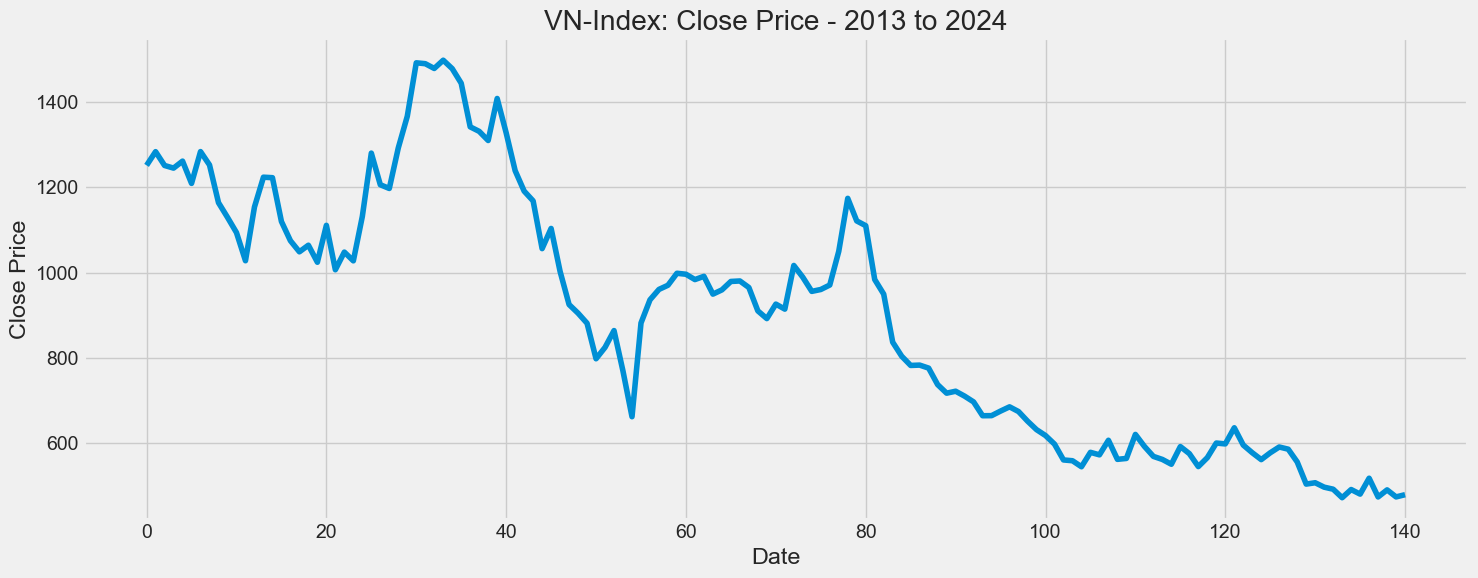

In [10]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f"VN-Index: Close Price - 2013 to 2024")
df['Price'].plot()
plt.tight_layout()

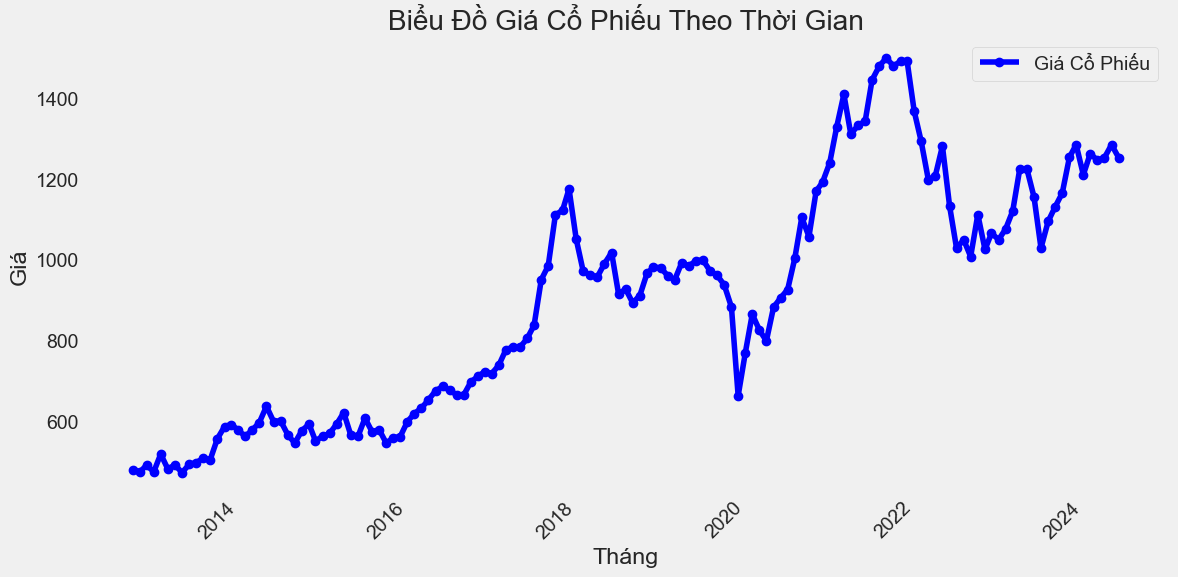

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', color='b', label='Giá Cổ Phiếu')
plt.title('Biểu Đồ Giá Cổ Phiếu Theo Thời Gian')
plt.xlabel('Tháng')
plt.ylabel('Giá')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# df = df.drop(columns=['Open', 'High','Low', 'Vol.','Change %'])
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# df['Price'] = df['Price'].str.replace(',', '').astype(float)
# df['Year'] = df['Date'].dt.year
# df=df.set_index('Date')
# df.head


### Moving Average in Moths

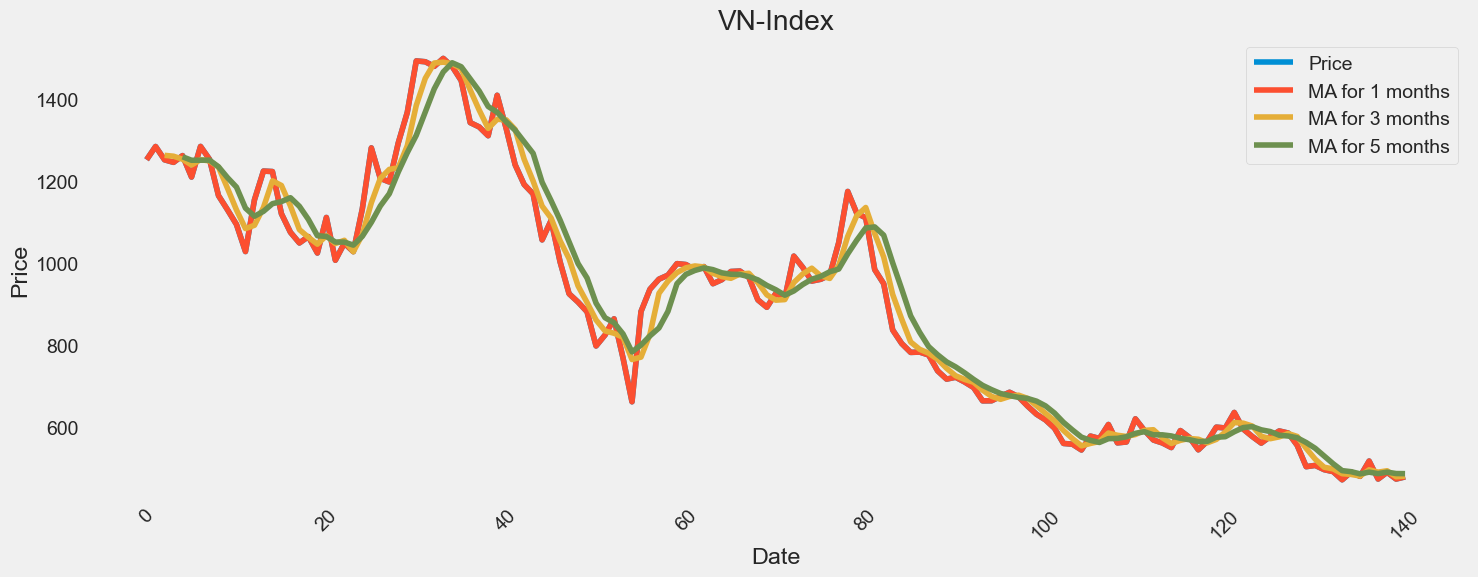

In [13]:
ma_days = [1, 3, 5]

for ma in ma_days:
    column_name = f"MA for {ma} months"
    df[column_name] = df['Price'].rolling(ma).mean()

df[['Price'] + [f"MA for {ma} months" for ma in ma_days]].plot(figsize=(15, 6)).set_title('VN-Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Candlestick Chart

In [14]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                       open=df['Open'],
                                       high=df['High'],
                                       low=df['Low'],
                                       close=df['Price'])])

fig.update_layout(title='Biểu đồ nến',
                  xaxis_title='Tháng',
                  yaxis_title='Giá',
                  xaxis_rangeslider_visible=True)

fig.show()

### Trend Chart

In [15]:
df['SMA_4'] = df['Price'].rolling(window=4).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Price'], mode='lines+markers', name='Giá cổ phiếu'))

fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA_4'], mode='lines', name='SMA 4 tháng'))

fig.update_layout(title='Xu hướng giá cổ phiếu với đường trung bình động',
                  xaxis_title='Tháng',
                  yaxis_title='Giá cổ phiếu')

fig.show()

### Volatility Chart

In [16]:
# Tính độ lệch chuẩn 7 ngày
df['Volatility'] = df['Price'].rolling(window=7).std()

# Vẽ biểu đồ biến động
fig = go.Figure()

# Độ lệch chuẩn
fig.add_trace(go.Scatter(x=df['Date'], y=df['Volatility'], mode='lines', name='Biến động'))

fig.update_layout(title='Biến động giá cổ phiếu',
                  xaxis_title='Tháng',
                  yaxis_title='Độ lệch chuẩn')

fig.show()

### Market State Chart

In [17]:
df['Market_State'] = 'Đi ngang'
df.loc[df['Price'] > df['Price'].shift(1), 'Market_State'] = 'Tăng'
df.loc[df['Price'] < df['Price'].shift(1), 'Market_State'] = 'Giảm'

fig = go.Figure()

colors = {'Tăng': 'green', 'Giảm': 'red', 'Đi ngang': 'blue'}
fig.add_trace(go.Scatter(x=df['Date'], y=df['Price'], mode='lines', name='Giá cổ phiếu', line=dict(color='black')))

for state in colors.keys():
    filtered_df = df[df['Market_State'] == state]
    fig.add_trace(go.Scatter(x=filtered_df['Date'], y=filtered_df['Price'], mode='markers', name=state,
                             marker=dict(color=colors[state], size=8)))

fig.update_layout(title='Trạng thái thị trường cổ phiếu',
                  xaxis_title='Tháng',
                  yaxis_title='Giá cổ phiếu')

fig.show()


### Return Distribution Chart

In [18]:
df['Return'] = df['Price'].pct_change()

fig = go.Figure()

fig.add_trace(go.Histogram(x=df['Return'], nbinsx=30, name='Lợi nhuận'))

fig.update_layout(title='Phân bổ lợi nhuận cổ phiếu',
                  xaxis_title='Lợi nhuận hàng tháng',
                  yaxis_title='Tần suất')

fig.show()


## VN-Index (day)

In [19]:
df_day = pd.read_csv("C:\Code\VN-Index\Raw Data\VN-Index(daily).csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Code\\VN-Index\\Raw Data\\VN-Index(daily).csv'

In [38]:
df_day.head

<bound method NDFrame.head of            Date     Price      Open      High       Low     Vol. Change %
0    01-09-2024  1,251.71  1,283.87  1,283.87  1,244.79      NaN   -2.50%
1    01-08-2024  1,283.87  1,251.51  1,290.45  1,184.53   15.47B    2.59%
2    01-07-2024  1,251.51  1,245.32  1,297.96  1,218.65   15.64M    0.50%
3    01-06-2024  1,245.32  1,261.72  1,306.01  1,240.15   18.12M   -1.30%
4    01-05-2024  1,261.72  1,212.13  1,285.63  1,206.28   19.39M    4.32%
..          ...       ...       ...       ...       ...      ...      ...
136  01-05-2013    518.39    474.54    526.58    470.81    1.50M    9.25%
137  01-04-2013    474.51    490.66    518.46    466.56  926.70K   -3.37%
138  01-03-2013    491.04    476.51    500.59    461.61    1.05M    3.47%
139  01-02-2013    474.56    477.11    497.87    459.64    1.15M   -1.09%
140  01-01-2013    479.79    415.50    490.89    413.68    1.83M   15.97%

[141 rows x 7 columns]>

In [39]:
df_day.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,141,141,141,141,141,140,141
unique,141,141,141,141,141,130,134
top,01-09-2024,"1,251.71","1,283.87","1,283.87","1,244.79",2.80M,4.72%
freq,1,1,1,1,1,2,2


In [40]:
df_day.isnull().sum()
df_day.fillna(0, inplace=True)

In [41]:
df_day['Date']=pd.to_datetime(df_day['Date'])
df_day['Year'] = df_day['Date'].dt.year
#df_day=df_day.set_index('Date')
df_day['Price'] = df_day['Price'].str.replace(',', '').astype(float)
df_day['Open'] = df_day['Open'].str.replace(',', '').astype(float)
df_day['High'] = df_day['High'].str.replace(',', '').astype(float)
df_day['Low'] = df_day['Low'].str.replace(',', '').astype(float)
df_day['Change %'] = df_day['Change %'].str.replace('%', '').astype(float)
df_day['Volume'] = df_day['Vol.'].replace({'B': '*1e9', 'M': '*1e6', 'K':'*1e3'}, regex=True).map(pd.eval).astype(float)
df_day['Volume'] = df_day['Volume'].apply(lambda x: f"{x:,.0f}")  # Định dạng số với dấu phẩy

In [44]:
df['Market_State'] = 'Đi ngang'
df.loc[df['Price'] > df['Price'].shift(1), 'Market_State'] = 'Tăng'
df.loc[df['Price'] < df['Price'].shift(1), 'Market_State'] = 'Giảm'

fig = go.Figure()

colors = {'Tăng': 'green', 'Giảm': 'red', 'Đi ngang': 'blue'}
fig.add_trace(go.Scatter(x=df['Date'], y=df['Price'], mode='lines', name='Giá cổ phiếu', line=dict(color='black')))

for state in colors.keys():
    filtered_df = df[df['Market_State'] == state]
    fig.add_trace(go.Scatter(x=filtered_df['Date'], y=filtered_df['Price'], mode='markers', name=state,
                             marker=dict(color=colors[state], size=8)))

fig.update_layout(title='Trạng thái thị trường cổ phiếu',
                  xaxis_title='Ngày',
                  yaxis_title='Giá cổ phiếu')

fig.show()